# Data Visualization: Rules and Guidelines

> **Co-author**
- [Paul Schrimpf *UBC*](https://economics.ubc.ca/faculty-and-staff/paul-schrimpf/)


**Prerequisites**

- [Introduction to Plotting](scientific/plotting.ipynb)  


**Outcomes**

- Understand steps of creating a visualization  
- Know when to use each of the core plots  
- Introductory ability to make effective visualizations  

## Outline

- [Data Visualization: Rules and Guidelines](#Data-Visualization:-Rules-and-Guidelines)  
  - [Introduction](#Introduction)  
  - [Steps to creating effective charts](#Steps-to-creating-effective-charts)  
  - [Visualization Types](#Visualization-Types)  
  - [Color in plots](#Color-in-plots)  
  - [Visualization Rules](#Visualization-Rules)  
  - [References](#References)  
  - [Exercises](#Exercises)  

In [ ]:
# Uncomment following line to install on colab
#! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [2]:
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

from pandas_datareader import DataReader

%matplotlib inline
# activate plot theme
#import qeds
#qeds.themes.mpl_style();

## Introduction

The job of an economist (or data scientist) goes beyond simply learning new things using data and
theory

The point of learning these new things is to be able to communicate these ideas to others
whether the medium is an academic paper or a business meeting

One of the most effective mediums to do this communication is visualizations

Well done visualizations help your audience remember your message

They accomplish this through at least two main channels:

1. Pyschology researchers refer to the fact that pictures/images are more likely to be remembered than
  words as [*picture superiority*](https://en.wikipedia.org/wiki/Picture_superiority_effect). There
  is some discrepancy about the size of this effect and what causes, but there is strong agreement that
  the effect exists. As an example about how large these effects might be, we describe the outcomes
  from a paper by Defeyter, Russo, and McPartlin (2009). In this paper, the authors found that
  after participants had studied some set of pictures and words for approximately 500 ms each
  that the participants were able to identify pictures they had previously studied with 75-85%
  accuracy and words with only a 55-65% accuracy.  
1. Data visualizations help people walk through the same logic you went through to build the chart
  which allows them to reason through the argument and makes your claim more convincing  


In this lecture we will discuss the process for creating a data visualization, ways to best ensure
that your message is successfully communicated, and some general design guidelines

Along the way you will be introduced to many features of `matplotlib` that were not discussed in the
introductory lecture

We won’t discuss most of these features, but encourage you to read more in the
[online documentation](https://matplotlib.org/contents.html) if you have questions

## Steps to creating effective charts

Before we begin discussions of specific recommendations, we think it is helpful to agree on
the goal of a data visualization and a process that can be used to accomplish the goal

As mentioned in the introduction, the purpose of a visualization is to facilitate the communication
of a message or idea

We have found the following steps to be useful for achieving this goal:

1. Identify the message  
1. Describe your visualization  
1. Create a draft of the visualization (and verify your data!)  
1. Fine tune the visualization details  


After discussing the role research plays in data visualization, we will use an example to provide
deeper context for the remaining steps

**Step 0: Research**

Before we proceed, it’s important to note that prior to reaching this process, you will have spent
a significant amount of time exploring the data and thinking about your overall message

In fact, during the research step you will almost certainly produce visualizations to help you
understand the data you are working with

These visualizations can highlight outliers or unlikely combinations of variables

For example, NYC publishes data on taxi pickups and dropoffs

One might expect tips to be somewhat independent of whether someone pays cash or credit, but
the 75th percentile tip for those who pay in cash is 0!!!

Because it’s unlikely that people who pay in cash choose not to tip, one likely explanation
is that it is a reporting issue

The steps and guidelines that follow may be helpful in the research process, but it’s not practical
to get each of your exploratory visualizations to a point where you would be able to publish them,
so some of these recommendations will be specific to what should happen to create a visualization
that you will use to tell your story after you understand what it is

### Example

The output of this example will be a reproduction of a visualization from
[this NYT article](https://www.nytimes.com/2019/01/11/upshot/big-cities-low-skilled-workers-wages.html)

This NYT article is based on research done by David Autor <sup>[1](#ely)</sup> , an
economist at MIT, and his co-authors.

Autor’s research investigates the changes we have observed over time in the
United States between work opportunities in rural and urban locations

This particular graph explores the fact that for much of the 20th century
both college educated workers and non-college educated workers were able
to find higher paying jobs by working in urban areas

More recently this *city wage premium* is still apparent for those
with college educations, however for those without a college education it has
disappeared

#### Identify the message

The first step to creating a visualization might feel a little obvious, however, in many ways, this
is the most important step

If you fail to choose a concise message then you won’t be able to communicate an idea clearly

In this example, we want people to be able to answer the question, “What has happened to the
rural/urban wage gap for non-college educated workers since the 1950s?”

Since part of what makes the answer to this question interesting is that it is unique to non-college
educated workers, we will also want to display what has happened to the wage gap for college
educated workers

#### Visualize

The ability to choose the type of visualization that will best illustrate your point is an important
skill to develop

Using the wrong type of visualization can inhibit the flow of information from the
graph to your audience’s brain

In our case, we need to display the relationship between population density (our measure of
rural/urban) and wages for different years and education levels

Since the wage gap will be the main focus, we want to choose a visualization that best highlights
this aspect of the data

One of the most effective ways to demonstrate the relationship of two
variables is to make a scatter plot

We will place the log of population density on the x-axis and the log of wages on the y-axis

We will then need to find a way to demonstrate this for different years and education levels

The most natural way to proceed is to demonstrate one of these variables using color and the other using
different subplots

In the original article, they chose to highlight differences in college
education using color and time using subplots

#### Visualization draft

Drafting an early version of your visualization without concerning yourself about how good the graph
looks allows you to think about whether it is able to answer the proposed question

Sometimes you’ll get to this step and realize that you need to go back to one of the previous
steps…

It’s ok to scrap what you have and restart at square one

In fact, you will frequently do this no matter how much experience you’ve developed

We find that it’s not uncommon to discard ten or more versions of a graph before
settling on a draft we are happy with

Below we create a draft of the plot we want to show

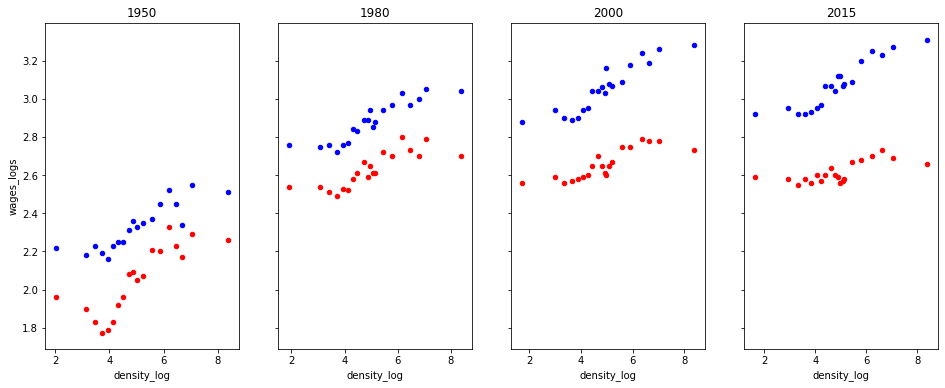

In [3]:
# Read in data
df = pd.read_csv("https://storage.googleapis.com/qeds/data/density_wage_data.csv")
df["year"] = df.year.astype(int)  # Convert year to int


def single_scatter_plot(df, year, educ, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    # we can use .query() method to filter data or we can use pandas method to filter data 
    # _df = df.query("(year == @year) & (group == @educ)")
    if ax is None:
        _, ax = plt.subplots(1, 4, figsize=(16, 6), sharey=True)
    
    _df = df[(df["year"] == year) & (df["group"] == educ)]
    #print(_df)
    _df.plot(
        kind="scatter", x="density_log", y="wages_logs", ax=ax, color=color
    )

    return ax

# Create initial plot
fig, ax = plt.subplots(1, 4, figsize=(16, 6), sharey=True)

for (i, year) in enumerate(df.year.unique()):
    single_scatter_plot(df, year, "college", ax[i], "b")
    single_scatter_plot(df, year, "noncollege", ax[i], "r")
    ax[i].set_title(str(year))

In [3]:
df.head()

,density_log,density_lvls,wages_logs,wages_lvls,group,demo,year
0,2.03,7.59,2.22,9.23,college,all,1950
1,3.12,22.54,2.18,8.89,college,all,1950
2,3.48,32.44,2.23,9.32,college,all,1950
3,3.73,41.86,2.19,8.92,college,all,1950
4,3.93,50.90,2.16,8.68,college,all,1950



<a id='exercise-0'></a>
> See exercise 1 in the [*exercise list*](#exerciselist-0)

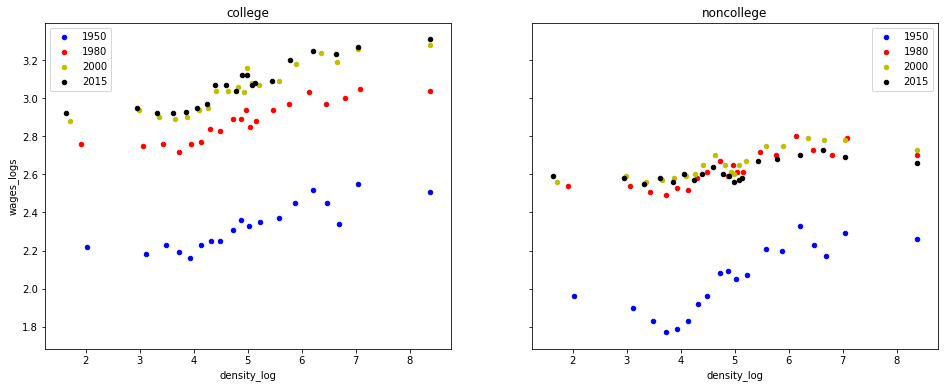

In [64]:
# Create a draft of the other way we could have organized time and education

# That is, have two subplots (one for each education level) and four groups of points (one for each year)

# Why do you think they chose to organize the information the way they did rather than this way?

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

col = np.array(["b", "r", "y", "black"])

for (i, group) in enumerate(df.group.unique()):
    for (k, y) in enumerate(df.year.unique()):
        single_scatter_plot(df, y, group, ax[i], col[k])
    
    #single_scatter_plot(df, 1950, group, ax[i], "b")
    #single_scatter_plot(df, 1980, group, ax[i], "r")
    #single_scatter_plot(df, 2000, group, ax[i], "y")
    #single_scatter_plot(df, 2015, group, ax[i], "black")
    
    ax[i].set_title(str(group))
    ax[i].legend(np.sort(df.year.unique()))

#### Fine tune

Great! We have now confirmed that the our decisions up until this point have made sense and that a
version of this graphic can successfully convey our message

The last step is to clean the graph up to make sure that it looks nice and that no features
detract or distract from our message

Much of the rest of this lecture will be dedicated to this fine tuning, so we will post-pone
presenting the details, but include the code we use to create the best version of this graphic below

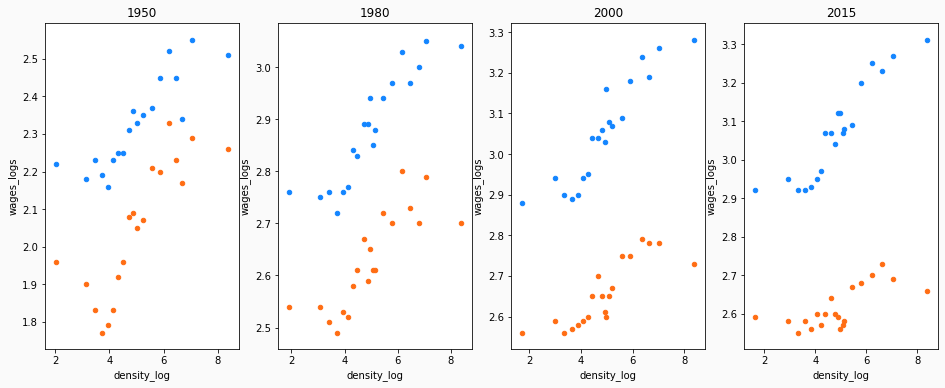

In [66]:
# Read in data
df = pd.read_csv("https://storage.googleapis.com/qeds/data/density_wage_data.csv")
df["year"] = df.year.astype(int)  # Convert year to int


def single_scatter_plot(df, year, educ, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    _df = df.query("(year == @year) & (group == @educ)")
    _df.plot(
        kind="scatter", x="density_log", y="wages_logs", ax=ax, color=color
    )

    return ax

# Create initial plot
fig, ax = plt.subplots(1, 4, figsize=(16, 6))
colors = {"college": "#1385ff", "noncollege": "#ff6d13"}

for (i, year) in enumerate(df.year.unique()):
    single_scatter_plot(df, year, "college", ax[i], colors["college"])
    single_scatter_plot(df, year, "noncollege", ax[i], colors["noncollege"])
    ax[i].set_title(str(year))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)

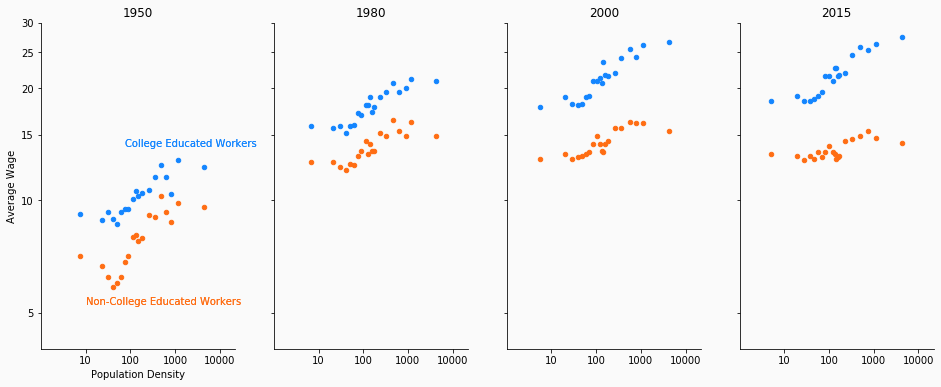

In [68]:
for (i, _ax) in enumerate(ax):
    # Label with words
    if i == 0:
        _ax.set_xlabel("Population Density")
    else:
        _ax.set_xlabel("")

    # Turn off right and top axis lines
    _ax.spines['right'].set_visible(False)
    _ax.spines['top'].set_visible(False)

    # Don't use such a white background color
    _ax.set_facecolor(bgcolor)

    # Change bounds
    _ax.set_ylim((np.log(4), np.log(30)))
    _ax.set_xlim((0, 10))

    # Change ticks
    xticks = [10, 100, 1000, 10000]
    _ax.set_xticks([np.log(xi) for xi in xticks])
    _ax.set_xticklabels([str(xi) for xi in xticks])

    yticks = list(range(5, 32, 5))
    _ax.set_yticks([np.log(yi) for yi in yticks])
    if i == 0:
        _ax.set_yticklabels([str(yi) for yi in yticks])
        _ax.set_ylabel("Average Wage")
    else:
        _ax.set_yticklabels([])
        _ax.set_ylabel("")

ax[0].annotate("College Educated Workers", (np.log(75), np.log(14.0)), color=colors["college"])
ax[0].annotate("Non-College Educated Workers", (np.log(10), np.log(5.25)), color=colors["noncollege"]);

fig

## Visualization Types

You have seen many kinds of visualizations throughout your life

We discuss a few of the most frequently used visualization types below and describe
the types of data they can be used to represent

For a more complete list of visualization types, see the Duke library’s
[data visualization guide](https://guides.library.duke.edu/datavis/vis_types)

### Scatter plots

Scatter plots can be used in various ways

They are frequently used to show how two variables are related to one another or compare
various observations based on two variables.

We found [an article](https://qz.com/1235712/the-origins-of-the-scatter-plot-data-visualizations-greatest-invention/)
about the scatter plot to be a good read

One of the strengths of a scatter plot is that its simplicity allows the data to speak for itself –
It is a plot of two variables and allows one to get an idea of whether the variables are
linearly related, quadratically related, or maybe not related at all

We have already seen an example that uses a scatter plot to show the relationship between two
variables

Below we demonstrate how it can be used to compare

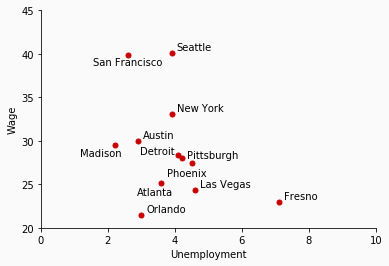

In [176]:
cities = [
    "San Francisco", "Austin", "Las Vegas", "New York", "Seattle", "Pittsburgh",
    "Detroit", "Fresno", "Phoenix", "Orlando", "Atlanta", "Madison"
]
unemp_wage = np.array([
    [2.6, 39.89], [2.9, 29.97], [4.6, 24.38], [3.9, 33.09], [3.9, 40.11], [4.2, 27.98],
    [4.1, 28.41], [7.1, 22.96], [4.5, 27.42], [3.0, 21.47], [3.6, 25.19], [2.2, 29.48]
])
df = pd.DataFrame(unemp_wage, index=cities, columns=["Unemployment", "Wage"])

fig, ax = plt.subplots()
df.plot(kind="scatter", x="Unemployment", y="Wage", ax=ax, s=25, color="#c90000")

# Add annotations
for (i, row) in df.iterrows():
    city = row.name

    if city in ["San Francisco", "Madison"]:
        offset = (-35, -10.5)
    elif city in ["Atlanta", "Phoenix", "Madison"]:
        offset = (-25, -12.5)
    elif city in ["Detroit"]:
        offset = (-38, 0)
    elif city in ["Pittsburgh"]:
        offset = (5, 0)
    else:
        offset = (5, 2.5)
    ax.annotate(
        city, xy=(row["Unemployment"], row["Wage"]),
        xytext=offset, textcoords="offset points"
    )

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.set_xlim(0, 10)
ax.set_ylim(20, 45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [87]:
[[i, row] for (i, row) in df.iterrows()]

[['San Francisco', Unemployment     2.60
  Wage            39.89
  Name: San Francisco, dtype: float64], ['Austin', Unemployment     2.90
  Wage            29.97
  Name: Austin, dtype: float64], ['Las Vegas', Unemployment     4.60
  Wage            24.38
  Name: Las Vegas, dtype: float64], ['New York', Unemployment     3.90
  Wage            33.09
  Name: New York, dtype: float64], ['Seattle', Unemployment     3.90
  Wage            40.11
  Name: Seattle, dtype: float64], ['Pittsburgh', Unemployment     4.20
  Wage            27.98
  Name: Pittsburgh, dtype: float64], ['Detroit', Unemployment     4.10
  Wage            28.41
  Name: Detroit, dtype: float64], ['Fresno', Unemployment     7.10
  Wage            22.96
  Name: Fresno, dtype: float64], ['Phoenix', Unemployment     4.50
  Wage            27.42
  Name: Phoenix, dtype: float64], ['Orlando', Unemployment     3.00
  Wage            21.47
  Name: Orlando, dtype: float64], ['Atlanta', Unemployment     3.60
  Wage            25.19
 

### Line plots

Line plots are best used to either show how a variable evolves over time or to demonstrate the
relationship between variables

It is useful to note that it differs in the way it displays relationships between variables

A line plot is restricted to displaying a line, so you cannot just draw a line between all of your
datapoints

Instead, before drawing the line, you must fit some kind of statistical model that can
show how one variable changes as the other changes

Below, we add regression lines of the estimated relationship between population density and wages to
our college/non-college urban wage premium plot to further illustrate our point

In fact in Dr. Autor’s original slides, he uses regression lines but the New York Times
chose to remove them

Text(2.302585092994046, 1.6582280766035324, 'Non-College Educated Workers')

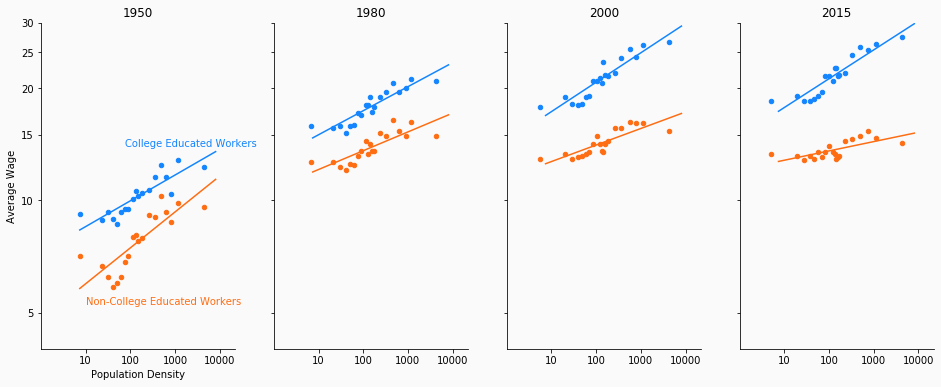

In [102]:
from sklearn.linear_model import LinearRegression

# Read in data
df = pd.read_csv("https://storage.googleapis.com/qeds/data/density_wage_data.csv")
df["year"] = df.year.astype(int)  # Convert year to int


def single_scatter_plot(df, year, educ, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    _df = df.query("(year == @year) & (group == @educ)")
    _df.plot(
        kind="scatter", x="density_log", y="wages_logs", ax=ax, color=color
    )

    lr = LinearRegression()
    X = _df["density_log"].values.reshape(-1, 1)
    y = _df["wages_logs"].values.reshape(-1, 1)
    # notice here, reshape your data either using array.reshape(-1, 1) if your data has a single feature 
    # or array.reshape(1, -1) if it contains a single sample. And to get array, we have to use .values to extract values
    # from a pd.Series object
    # X = _df["density_log"]
    # y = _df["wages_logs"]
    
    lr.fit(X, y)

    x = np.linspace(2.0, 9.0).reshape(-1, 1)
    y_pred = lr.predict(x)
    ax.plot(x, y_pred, color=color)

    return ax

# Create initial plot
fig, ax = plt.subplots(1, 4, figsize=(16, 6))
colors = {"college": "#1385ff", "noncollege": "#ff6d13"}

for (i, year) in enumerate(df.year.unique()):
    single_scatter_plot(df, year, "college", ax[i], colors["college"])
    single_scatter_plot(df, year, "noncollege", ax[i], colors["noncollege"])
    ax[i].set_title(str(year))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
for (i, _ax) in enumerate(ax):
    # Label with words
    if i == 0:
        _ax.set_xlabel("Population Density")
    else:
        _ax.set_xlabel("")

    # Turn off right and top axis lines
    _ax.spines['right'].set_visible(False)
    _ax.spines['top'].set_visible(False)

    # Don't use such a white background color
    _ax.set_facecolor(bgcolor)

    # Change bounds
    _ax.set_ylim((np.log(4), np.log(30)))
    _ax.set_xlim((0, 10))

    # Change ticks
    xticks = [10, 100, 1000, 10000]
    _ax.set_xticks([np.log(xi) for xi in xticks])
    _ax.set_xticklabels([str(xi) for xi in xticks])

    yticks = list(range(5, 32, 5))
    _ax.set_yticks([np.log(yi) for yi in yticks])
    if i == 0:
        _ax.set_yticklabels([str(yi) for yi in yticks])
        _ax.set_ylabel("Average Wage")
    else:
        _ax.set_yticklabels([])
        _ax.set_ylabel("")

ax[0].annotate("College Educated Workers", (np.log(75), np.log(14.0)), color=colors["college"])
ax[0].annotate("Non-College Educated Workers", (np.log(10), np.log(5.25)), color=colors["noncollege"])

In [99]:
df["density_log"]

0      2.03
1      3.12
2      3.48
3      3.73
4      3.93
       ... 
153    5.79
154    6.21
155    6.63
156    7.04
157    8.38
Name: density_log, Length: 158, dtype: float64

### Bar charts

Bar charts are mostly used to display differences for a variable between groups though they can also
be used to show how a variable changes over time (which in some ways is just showing a difference
between a variable as grouped by time…)

Bar charts show the differences between these groups using the length of each bar

This use of length makes it straightforward to compare the different groups

In the example below we show a bar chart of how the unemployment rate differs across several cities
in the United States

               Unemployment   Wage
Fresno                  7.1  22.96
Las Vegas               4.6  24.38
Phoenix                 4.5  27.42
Pittsburgh              4.2  27.98
Detroit                 4.1  28.41
New York                3.9  33.09
Seattle                 3.9  40.11
Atlanta                 3.6  25.19
Orlando                 3.0  21.47
Austin                  2.9  29.97
San Francisco           2.6  39.89
Madison                 2.2  29.48


Text(0.5, 1.0, 'Unemployment Rate in US Cities')

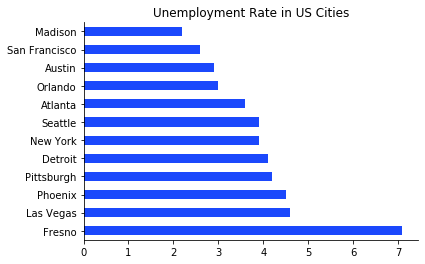

In [106]:
cities = [
    "San Francisco", "Austin", "Las Vegas", "New York", "Seattle", "Pittsburgh",
    "Detroit", "Fresno", "Phoenix", "Orlando", "Atlanta", "Madison"
]
unemp_wage = np.array([
    [2.6, 39.89], [2.9, 29.97], [4.6, 24.38], [3.9, 33.09], [3.9, 40.11], [4.2, 27.98],
    [4.1, 28.41], [7.1, 22.96], [4.5, 27.42], [3.0, 21.47], [3.6, 25.19], [2.2, 29.48]
])
df = pd.DataFrame(unemp_wage, index=cities, columns=["Unemployment", "Wage"])
df = df.sort_values(["Unemployment"], ascending=False)

print(df)

fig, ax = plt.subplots()

# the argument "barh" means to plot bars horizontally 
df["Unemployment"].plot(kind="barh", ax=ax, color="#1b48fc")
# we can also plot vertical bars by passing the argument "bar" to the .plot() method 
# df["Unemployment"].plot(kind="bar", ax=ax, color="#1b48fc")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Unemployment Rate in US Cities")

### Histograms

Histograms are used to display the approximate distribution of a single variable

They can be particularly important when variables you use are not distributed normally
since we typically tend to think of means and variances in terms of the normal distribution

In the example below, we show a histogram of GDP growth rates over the period 1948 - 2019

Our histogram indicates this variable is approximately normally distributed

Text(0.5, 1.0, 'US GDP Growth from 1948-2019')

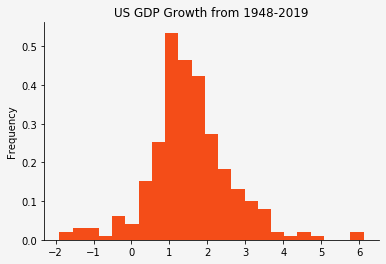

In [107]:
# GDP quarterly growth
gdp = DataReader("GDP", "fred", 1948, 2019).pct_change().dropna()
gdp = gdp * 100

fig, ax = plt.subplots()
gdp.plot(
    kind="hist", y="GDP", color=(244/255, 77/255, 24/255),
    bins=23, legend=False, density=True, ax=ax
)
ax.set_facecolor((0.96, 0.96, 0.96))
fig.set_facecolor((0.96, 0.96, 0.96))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("US GDP Growth from 1948-2019")

## Color in plots

Choosing colors for your plots is not always a straightforward task

Visualization expert Edward Tufte <https://www.edwardtufte.com/tufte/> wrote,

> … Avoiding catastrophe becomes the first principle in bringing color to information: Above
all, do no harm” ([*Envisioning Information*](https://www.edwardtufte.com/tufte/books_ei) by Edward Tufte)


So how do we, “do no harm?”

### Hue Saturation Lightness

We will use the [Hue Saturation Value](https://en.wikipedia.org/wiki/HSL_and_HSV) (HSV) paradigm as a way to formalize our discussion of colors

- **Hue**: Denotes the share of each of the primary colors (red, green, blue) in the represented color
  represented as angles around a circle. The hue begins with red at 0 degrees, green at 120
  degrees, and blue at 240 degrees (Note: matplotlib converts these back into numbers between 0 and
  1 by dividing by 360). Angles between these colors are mixes of the primary colors  
- **Saturation**: Denotes how rich the color is using numbers between 0 and 1. At full saturation
  (saturation is 1), the color is as rich as it can possibly be. At saturation 0, the color has no
  color left and is approximately a projection of the color into gray scale (Note that this is not
  exactly true)  
- **Value**: Denotes how dark the color is using numbers between 0 and 1. We view this as how much black
  has been added to a color. If a color has value 0 then it is as dark as possible and is just the
  color black. If the color has value 1 then it has no black and is just the original color  


The way in which HSV covers the color space is demonstrated in the following figure

<img src="https://storage.googleapis.com/qeds/_static/visualization_files/HSV_color_solid_cylinder_saturation_gray.png" alt="HSL_cylinder.png" style="">

  
Image attribution: By [SharkD](https://commons.wikimedia.org/w/index.php?curid=9801673)

Below we demonstrate how colors change as we move hue/saturation/value one at a time

In [108]:
def color_swatches(colors):

    ncolors = len(colors)
    fig, ax = plt.subplots(figsize=(ncolors*2, 2))

    for (start_x, color) in enumerate(colors):
        color_rect = patches.Rectangle((start_x, 0), 1, 1, color=color)
        ax.add_patch(color_rect)

    ax.set_xlim(0, len(colors))
    ax.set_ylim(0, 1)
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_xticklabels([])

    return fig

Text(0.5, 0.98, 'Varying Hue')

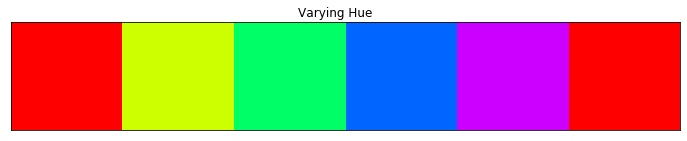

In [109]:
# Vary hue
colors = [mplc.hsv_to_rgb((i/360, 1, 1)) for i in np.linspace(0, 360, 6)]
fig = color_swatches(colors)
fig.suptitle("Varying Hue")

Text(0.5, 0.98, 'Varying Saturation')

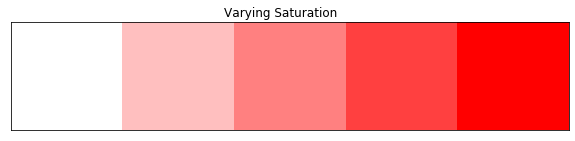

In [110]:
# Vary saturation
colors = [mplc.hsv_to_rgb((0, i, 1)) for i in np.linspace(0, 1, 5)]
fig = color_swatches(colors)
fig.suptitle("Varying Saturation")

Text(0.5, 0.98, 'Varying Value')

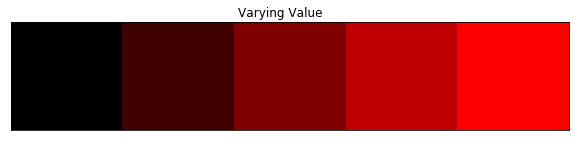

In [111]:
# Vary value
colors = [mplc.hsv_to_rgb((0, 1, i)) for i in np.linspace(0, 1, 5)]
fig = color_swatches(colors)
fig.suptitle("Varying Value")

### Color Palettes

A good color palette will exploit aspects of hue, saturation, and value to emphasize the information
in the data visualization

For example, for qualitatively different groups (where we just want to identify separate groups
and there aren’t quantitative relationships between them) one could fix
the saturation and value and draw $ N $ evenly spaced values from hue space

However, creating a good color palette sometimes requires more nuance than can be attributed to
rules of thumb

Luckily, matplotlib and other Python packages have good packages that can help choose good color
palettes and it is often better to rely on these pre-built color palettes and
themes than creating your own

We can get a list of all of the color palettes (referred to as color maps by matplotlib) included
with matplotlib by doing

In [112]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

The [matplotlib documentation](https://matplotlib.org/tutorials/colors/colormaps.html)
differentiates between colormaps used for varying purposes

Colormaps are often split into several categories based on their function (see, e.g., [Moreland]):

- Sequential: change in lightness and often saturation of color incrementally,
  often using a single hue; should be used for representing information that has ordering  
- Diverging: change in lightness and possibly saturation of two different
  colors that meet in the middle at an unsaturated color; should be used when the
  information being plotted has a critical middle value, such as topography or
  when the data deviates around zero  
- Cyclic: change in lightness of two different colors that meet in
  the middle and beginning/end at an unsaturated color; should be used for
  values that wrap around at the endpoints, such as phase angle, wind direction, or time of day  
- Qualitative: often are miscellaneous colors; should be used to represent
  information which does not have ordering or relationships  


Most of the examples we have used so far can use qualitative color maps because they are simply
meant to distinguish between different variables/observations and not say something about how they
differ

Additionally, three other nice sources of information on colors and color palettes are the

- The [seaborn documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)  
- A [talk](https://www.youtube.com/watch?v=xAoljeRJ3lU) given at the Scipy conference in 2015 by
  Nathaniel Smith  
- A [website](https://colorusage.arc.nasa.gov/graphics_page_design.php) literally put together by
  “rocket scientists” at NASA  

### Do no harm

Now that we have a little background that we can use as a common language, we can proceed with
discussing how we can use color effectively

#### Sometimes value is more effective than hue

Sometimes it is more effective to use the same color with different values to highlight differences
in a graph with many lines

Compare the following example which is a modification of an example by Larry Arend, Alex Logan, and
Galina Havin’s [graphics website](https://colorusage.arc.nasa.gov/graphics_page_design.php) (the NASA one we linked above)

In [113]:
def confusing_plot(colors):

    c1, c2, c3 = colors

    fig, ax = plt.subplots()

    x1 = np.linspace(0.2, 0.9, 5)
    x2 = np.linspace(0.3, 0.8, 5)

    ax.text(0.4, 0.10, "Not Important", color=c3, fontsize=15)
    ax.text(0.25, 0.25, "Not Important", color=c3, fontsize=15)
    ax.text(0.5, 0.70, "Not Important", color=c3, fontsize=15)
    ax.plot(x1, 1.25*x1 - 0.2, color=c3, linewidth=2)
    ax.plot(x1, 1.25*x1 + 0.1, color=c3, linewidth=2)
    ax.plot(x1, 0*x1 + 0.3, color=c3, linewidth=2)
    ax.plot(x2, 0.15*x1 + 0.4, color=c2, linewidth=3)
    ax.plot(x1, -x1 + 1.2, color=c2, linewidth=3)
    ax.plot(x1, -x1 + 1.25, color=c2, linewidth=3)
    ax.text(0.10, 0.5, "Second order", color=c2, fontsize=22)
    ax.text(0.5, 0.35, "Second order", color=c2, fontsize=22)
    ax.text(0.40, 0.65, "Second order", color=c2, fontsize=22)
    ax.plot(x2, 0.25*x1 + 0.1, color=c1, linewidth=5)
    ax.text(0.05, 0.4, "Important", color=c1, fontsize=34)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    return fig

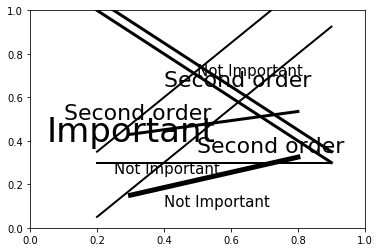

In [114]:
# All black
colors = [mplc.hsv_to_rgb((0, 1, x)) for x in [0.0, 0.0, 0.0]]
fig = confusing_plot(colors)

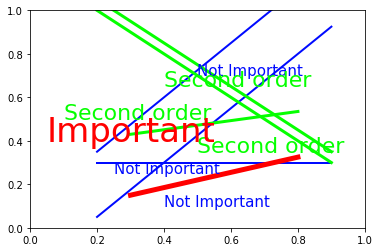

In [115]:
# Vary the hues
colors = [mplc.hsv_to_rgb((x, 1, 1)) for x in [0.0, 0.33, 0.66]]
fig = confusing_plot(colors)

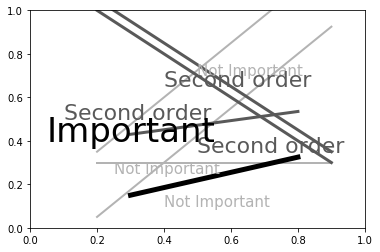

In [116]:
# Vary the values
colors = [mplc.hsv_to_rgb((0, 0, x)) for x in [0.00, 0.35, 0.7]]
fig = confusing_plot(colors)

In our opinion, the last one which uses no color turns out to be the most readable

The point of this exercise is **not** to not use color in your plots, but rather to
encourage you to think about whether hue or value will be more effective in
communicating your message

#### Carelessness with value can make grayscale impossible to read

Recall that driving the saturation to 0 is approximately equivalent to projecting the colors
onto grayscale

Well, if you aren’t careful in choosing your colors then they may have the same
values and be unidentifiable once converted to grayscale

This code is based on an [example](https://matplotlib.org/gallery/statistics/barchart_demo.html#barchart-demo)
from the matplotlib documentation

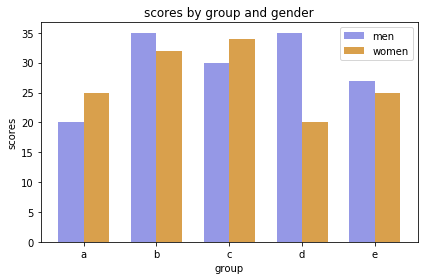

In [166]:
n_groups = 5

means_men = (20, 35, 30, 35, 27)
means_women = (25, 32, 34, 20, 25)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

color_men = mplc.hsv_to_rgb((0.66, 0.35, 0.9))
rects1 = ax.bar(
    index, means_men, bar_width, color=color_men, label='men'
)

color_women = mplc.hsv_to_rgb((0.10, 0.65, 0.85))
rects2 = ax.bar(
    index + bar_width, means_women, bar_width, color=color_women, label='women'
)

ax.set_xlabel('group')
ax.set_ylabel('scores')
ax.set_title('scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('a', 'b', 'c', 'd', 'e'))
ax.legend()

fig.tight_layout()

   men  women
a   20     25
b   35     32
c   30     34
d   35     20
e   27     25


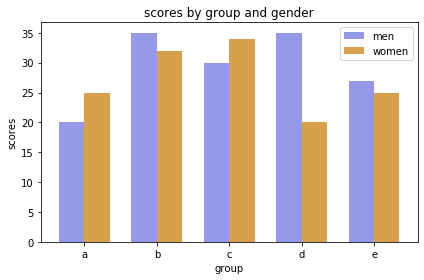

In [187]:
# an alternative way to create this bar plot

means_men = (20, 35, 30, 35, 27)
means_women = (25, 32, 34, 20, 25)
df = pd.DataFrame({"men": means_men, "women" : means_women}, index = ['a', 'b', 'c', 'd', 'e'])
print(df)
bar_width = 0.7
color_men = mplc.hsv_to_rgb((0.66, 0.35, 0.9))
color_women = mplc.hsv_to_rgb((0.10, 0.65, 0.85))

fig, ax = plt.subplots()
df.plot(kind = "bar", color = [color_men, color_women], label = ["men", "women"], width = bar_width, ax = ax)
ax.set_xlabel('group')
ax.set_ylabel('scores')
ax.set_title('scores by group and gender')
ax.set_xticklabels(df.index, rotation = 0)
ax.legend()

fig.tight_layout()


And here is the same image converted to grayscale

<img src="https://storage.googleapis.com/qeds/_static/visualization_files/bar_grayscale.png" alt="bar_grayscale.png" style="">

  
The image below, from [this flowingdata blog entry](https://flowingdata.com/2012/11/09/incredibly-divided-nation-in-a-map),
shows what happens when you don’t check your colors… Don’t do this

<img src="https://storage.googleapis.com/qeds/_static/visualization_files/Divided-nation.jpg" alt="Divided-nation.jpg" style="">

  
Warm colors (colors like red, yellow, and orange) often appear lighter than cool colors (colors
like blue, green and purple) when converted to grayscale even when they have similar values.
Sometimes to know whether colors are different enough, you just have to test it out

#### Use color to draw attention

If you are displaying information about various groups but are really only interested in how one
group differs from the others then choose several close together hues to represent the less
important groups and a distinct color to display the group of interest

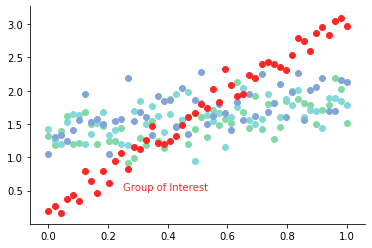

In [169]:
fig, ax = plt.subplots()

npts = 50
x = np.linspace(0, 1, npts)

np.random.seed(42)  # Set seed for reproducibility
y1 = 1.20 + 0.75*x + 0.25*np.random.randn(npts)
y2 = 1.35 + 0.50*x + 0.25*np.random.randn(npts)
y3 = 1.40 + 0.65*x + 0.25*np.random.randn(npts)
y4 = 0.15 + 3.0*x + 0.15*np.random.randn(npts)  # Group of interest

colors = [mplc.hsv_to_rgb((x, 0.4, 0.85)) for x in [0.40, 0.50, 0.60]]
colors.append(mplc.hsv_to_rgb((0.0, 0.85, 1.0)))

for (y, c) in zip([y1, y2, y3, y4], colors):
    ax.scatter(x=x, y=y, color=c, s=36)

ax.text(0.25, 0.5, "Group of Interest", color=colors[-1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [168]:
list(zip([1,2,3], [2,3,4]))

[(1, 2), (2, 3), (3, 4)]


<a id='exercise-1'></a>
> See exercise 2 in the [*exercise list*](#exerciselist-0)

#### Don’t use color to differentiate small objects

Color is a great differentiator when there is enough of it to see… However, when the objects
become too small, it becomes very difficult to separate even colors that are very different

Below is the same plot as we had above, but we have made the points in the scatter plot smaller

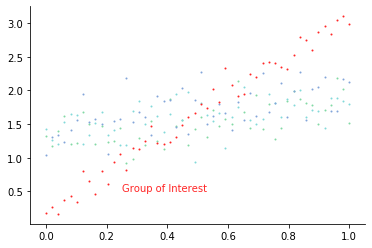

In [177]:
fig, ax = plt.subplots()

npts = 50
x = np.linspace(0, 1, npts)

np.random.seed(42)  # Set seed for reproducibility
y1 = 1.20 + 0.75*x + 0.25*np.random.randn(npts)
y2 = 1.35 + 0.50*x + 0.25*np.random.randn(npts)
y3 = 1.40 + 0.65*x + 0.25*np.random.randn(npts)
y4 = 0.15 + 3.0*x + 0.15*np.random.randn(npts)  # Group of interest

colors = [mplc.hsv_to_rgb((x, 0.4, 0.85)) for x in [0.40, 0.50, 0.60]]
colors.append(mplc.hsv_to_rgb((0.0, 0.85, 1.0)))

for (y, c) in zip([y1, y2, y3, y4], colors):
    ax.scatter(x=x, y=y, color=c, s=1)

ax.text(0.25, 0.5, "Group of Interest", color=colors[-1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

It becomes harder to read, though, because the red is so much darker than some of the other colors,
it is still possible to find the group of interest (a lesson to be learned here!)

#### Colors connotations

Some colors have connotations

It is confusing when colors are used to mean the opposite of what they are used for

For example, using red to denote positive profits and black to denote negative profits would be
a poor color choice because red is often associated with losses and black is associated with profits

In [178]:
df = pd.DataFrame(
    {"profits": [1.5, 2.5, 3.5, -6.7, -2.0, 1.0]},
    index=[2005, 2006, 2007, 2008, 2009, 2010]
)

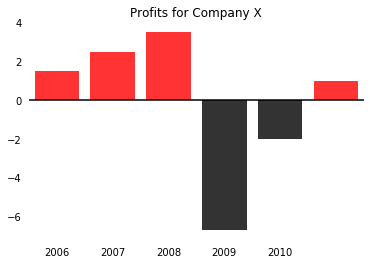

In [179]:
fig, ax = plt.subplots()

colors = ["k" if x < 0 else "r" for x in df["profits"].values]
bars = ax.bar(np.arange(len(colors)), df["profits"].values, color=colors, alpha=0.8)
ax.hlines(0, -1.0, 6.0)
ax.set_xticklabels(df.index)

ax.set_xlim(-0.5, 5.5)
ax.set_title("Profits for Company X")

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

for _spine in ["right", "top", "left", "bottom"]:
    ax.spines[_spine].set_visible(False)

This plot becomes much more intuitive by using red for negative values

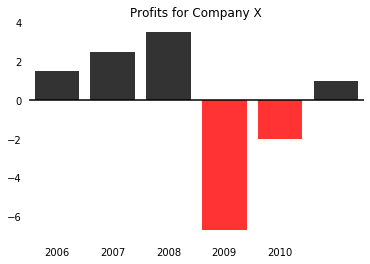

In [180]:
fig, ax = plt.subplots()

colors = ["r" if x < 0 else "k" for x in df["profits"].values]
bars = ax.bar(np.arange(len(colors)), df["profits"].values, color=colors, alpha=0.8)
ax.hlines(0, -1.0, 6.0)
ax.set_xticklabels(df.index)

ax.set_xlim(-0.5, 5.5)
ax.set_title("Profits for Company X")

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

for _spine in ["right", "top", "left", "bottom"]:
    ax.spines[_spine].set_visible(False)

#### Color blindness friendly

Nearly 1 in 10 men have some form of color blindness

The most prevalent form of color blindness makes it difficult to differentiate between red
and green

So, besides making your plots feel “Christmas themed”, using both red and green as a
way to illustrate differences can often make it difficult for some to follow

There are Python libraries that allow you to simulate different forms of color blindness or choose
sensible defaults for colors

We recommend viewing the documentation for
[colorspacious](https://colorspacious.readthedocs.io/en/latest/tutorial.html#simulating-colorblindness)
and [viscm](https://github.com/matplotlib/viscm)

## Visualization Rules

We have already discussed some guidelines for color

We will now discuss some guidelines for which elements to include and how to structure your graphs

There are probably cases in which it makes sense to violate each of these, but please have a
good reason for doing so (and which you can explain when someone points out what you’ve done)

The main theme for these guidelines will be to keep the plot as simple as possible so that your
readers can get the clearest understanding of your story

Many people try too hard to make their plot eye-catching and in the process, they destroy the
message in the graph.

Graphs should be a simple as possible, but not simpler

We will discuss some of the guidelines that we feel are most abused, but many very good books have
been written on this subject

Some books that we have found extremely instructive are:

1. *Visual Display of Quantitative Information* by Edward Tufte  
1. *The Wall Street Journal Guide to Information Graphics: The Dos and Don’ts of Presenting Data,
  Facts, and Figures* by Dona M Wong  
1. *The Functional Art: An introduction to information graphics and visualization* by Alberto Cairo  


Some blogs that we think are useful for seeing well done visualizations are:

1. Flowing Data: [https://flowingdata.com/](https://flowingdata.com/)  
1. Story Telling with Data: [http://www.storytellingwithdata.com/](http://www.storytellingwithdata.com/)  
1. Visualizing Data: [http://www.visualisingdata.com/](http://www.visualisingdata.com/)  
1. Junk Charts: [https://junkcharts.typepad.com/](https://junkcharts.typepad.com/)  


As you begin to do more visualizations in your work, we recommend reading these books and following
some of these blogs

Seeing how others display their information will ensure that, when you run into interesting
problems in the future, you’ll have a well of knowledge that you can call upon

In fact, one friend of ours takes this very seriously

He keeps an organized binder of graphics that he has seen and likes

He reads this binder, sometimes for hours, when he is thinking about how to communicate messages
for his presentations

A couple last links to specific articles we enjoyed:

- [This Financial Times article](https://ig.ft.com/science-of-charts) is a great exercise to
  demonstrate how choice of graph type can affect a visualizations interpretability  
- [This article](https://towardsdatascience.com/data-visualization-best-practices-less-is-more-and-people-dont-read-ba41b8f29e7b)
  does an exceptional job at redesigning graphics that were poorly done to start  
- [Duke library data visualization guide](https://guides.library.duke.edu/datavis/topten) has a
  few concise rules worth reviewing  

### Bar plot recommendations

In Dona Wong’s book, she advises against using *zebra patterns*

In [181]:
df = pd.DataFrame(
    {
        "Unemployment Rate": [5.20, 5.67, 9.20, 4.03, 3.80],
        "Pension Expenditure (% of GDP)": [4.18, 4.70, 13.90, 6.24, 7.06],
        "Social Welfare Expenditure (% of GDP)": [7.42, 9.84, 19.72, 12.98, 14.50],
        "Highest Tax Rate": [47, 33, 59.6, 50, 39.6]
    },
    index = ["Australia", "Canada", "France", "UK", "USA"]
)

def create_barplot(df, colors):

    fig, ax = plt.subplots(figsize=(14, 6))

    df.T.plot(kind="bar", color=colors, ax=ax, edgecolor="k", rot=0)
    ax.legend(bbox_to_anchor=(0, 1.02, 1.0, 1.02), loc=3, mode="expand", ncol=5)
    ax.set_xticklabels(df.columns, fontsize=6)

    return fig

Instead she proposes using different shades of the same color (ordered from lightest to darkest!)

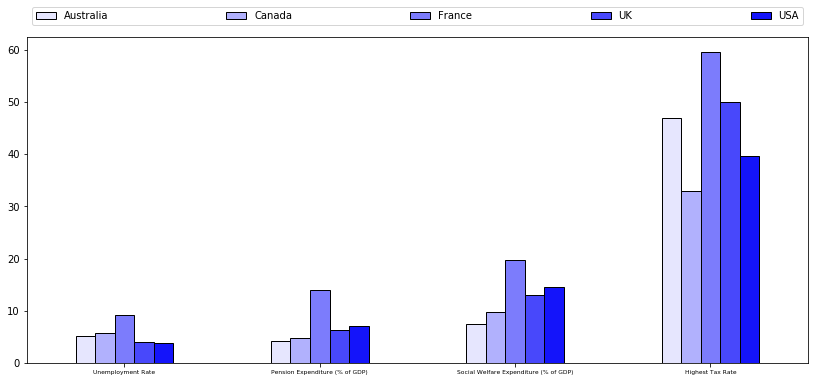

In [182]:
colors = [
    (0.902, 0.902, 0.997), (0.695, 0.695, 0.993), (0.488, 0.488, 0.989),
    (0.282, 0.282, 0.985), (0.078, 0.078, 0.980)
]

create_barplot(df, colors);

Notice that we put a legend at the top and maintain the same order as kept in the bars

Additionally, there is wide consensus that starting bar plots at any number besides 0 is a
misrepresentation of the data

Always start your bar plots at 0!

An example of how starting at a non-zero number is misleading can be seen below and was originally from the
[flowingdata blog](https://flowingdata.com/2012/08/06/fox-news-continues-charting-excellence)

First we look at a reproduction of the originally displayed image:

Text(0.5, 1.0, 'IF BUSH TAX CUTS EXPIRE\nTop Tax Rate')

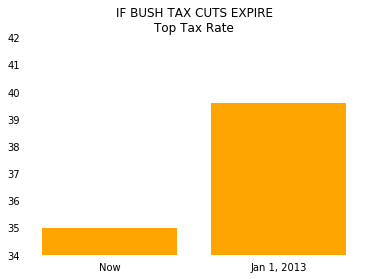

In [188]:
fig, ax = plt.subplots()

ax.bar([0, 1], [35, 39.6], color="orange")

ax.set_xticks([0, 1])
ax.set_xticklabels(["Now", "Jan 1, 2013"])
ax.set_ylim(34, 42)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

for _spine in ["right", "top", "left", "bottom"]:
    ax.spines[_spine].set_visible(False)

ax.set_title("IF BUSH TAX CUTS EXPIRE\nTop Tax Rate")

This looks like a big difference!

In fact, your eyes are telling you that taxes will increase by a factor of 5 if the tax cuts expire

If we start this same bar plot at 0, it becomes much less striking and tells you that the percentage
increase in the top tax rate is only 5-10 percent

Text(0.5, 1.0, 'IF BUSH TAX CUTS EXPIRE\nTop Tax Rate')

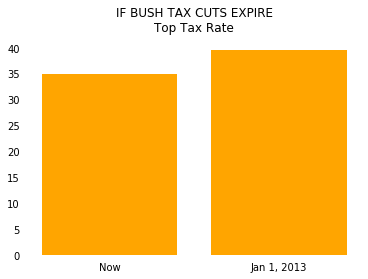

In [189]:
fig, ax = plt.subplots()

ax.bar([0, 1], [35, 39.6], color="orange")

ax.set_xticks([0, 1])
ax.set_xticklabels(["Now", "Jan 1, 2013"])
ax.set_ylim(0, 42)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

for _spine in ["right", "top", "left", "bottom"]:
    ax.spines[_spine].set_visible(False)

ax.set_title("IF BUSH TAX CUTS EXPIRE\nTop Tax Rate")

We also have opinions about what type of person uses all caps, but we’ll keep that to ourselves for
now

### Pie plots

As a general rule, you should avoid pie plots

When comparing groups, it is much easier for your reader to measure the heights on a
bar graph than determine the size of the angles in a pie chart

Let’s look at an example of this below

Text(0.5, 0.98, 'How many pieces of pie eaten')

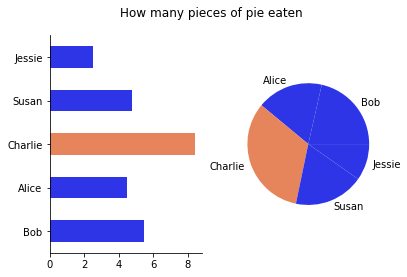

In [190]:
df = pd.DataFrame(
    {"values": [5.5, 4.5, 8.4, 4.75, 2.5]},
    index=["Bob", "Alice", "Charlie", "Susan", "Jessie"]
)

colors = [mplc.hsv_to_rgb((0.66, 0.8, 0.9))]*2
colors += [mplc.hsv_to_rgb((0.05, 0.6, 0.9))]
colors += [mplc.hsv_to_rgb((0.66, 0.8, 0.9))]*2

fig, ax = plt.subplots(1, 2)

df.plot(kind="barh", y="values", ax=ax[0], legend=False, color=colors)
df.plot(kind="pie", y="values", ax=ax[1], legend=False, colors=colors, startangle=0)

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].set_ylabel("")
fig.suptitle("How many pieces of pie eaten")

Using the pie chart, can you tell who ate more pie Alice or Susan? How about with the bar chart?

The pie chart can sometimes be used to illustrate whether one or two groups is much larger than the
others

If you were making a case that Charlie ate too much of the pie, and should pay more than an equal split,
then a pie chart works (though a bar plot also works…)

If you wanted to make a more precise point then you might consider going with a bar plot instead

### Simplify line plots

We’ve tried to emphasize repeatedly that simplifying your visualizations is essential to being able
to communicate your message

We do it again here and will do it a few more times after this…

Don’t try and fit too much information into a single line plot

We see people do this very frequently – remember that a visualization should have ONE main message

Do not pollute your message with extra information

In our example below, using World Bank data, we will show that Japan’s population is aging faster
than that of many other economically successful countries

We show this using the age dependency ratio, which is the number of individuals aged 65+ divided by the number of individuals who are 15-64, for each country over time

A high age dependency ratio means that the government will have a smaller tax base to collect from
but have relatively higher health and pension expenditures to pay to the old

In [194]:
download_url = "https://storage.googleapis.com/qeds/data/WorldBank_AgeDependencyRatio.csv"
df = pd.read_csv(download_url, na_values="..")
df = df[["Country Name", "1960", "1970", "1980", "1990", "2000", "2010", "2017"]]
df = df.set_index("Country Name").T
df.index = df.index.values.astype(int)

Country Name,Belgium,High income,Andorra,Austria,Bermuda,Canada,Channel Islands,Croatia,Cyprus,Czech Republic,...,French Polynesia,Guam,Japan,"Korea, Rep.",New Caledonia,New Zealand,Palau,Singapore,China,India
1960,18.376222,13.744274,NaN,18.519609,NaN,13.109897,20.158954,10.571643,10.286528,14.413716,...,5.211889,2.799322,8.766702,6.396860,6.186032,14.767453,NaN,3.735833,6.529213,5.401790
1970,21.331065,15.512807,NaN,22.737077,NaN,12.928618,21.609540,13.854234,17.086626,18.170554,...,5.312111,2.986577,9.962793,6.345822,6.086042,14.180889,NaN,5.750609,6.730170,5.944001
1980,22.082780,17.279326,NaN,23.638136,NaN,13.877560,22.491641,17.233587,14.241114,21.511675,...,5.832095,4.598475,13.205898,6.641375,7.363671,15.487708,NaN,6.925909,7.892754,6.351354
1990,22.347888,18.181059,NaN,21.895615,NaN,16.535884,21.069211,16.865589,15.334494,19.280922,...,5.528211,6.001460,17.038799,7.545287,7.834093,16.943840,NaN,7.675841,8.617654,6.572820
2000,25.723777,20.238646,NaN,22.704681,NaN,18.413387,20.912107,23.193421,15.182982,19.779975,...,6.715041,8.343367,24.892510,9.948581,9.007698,18.049099,NaN,10.316294,10.090750,7.227719


Let’s visualize these variables for a collection of many developed countries

Text(0, 0.5, 'Age Dependency Ratio')

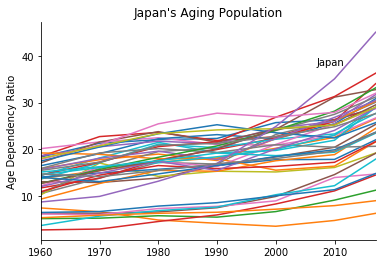

In [192]:
fig, ax = plt.subplots()

df.plot(ax=ax, legend=False)
ax.text(2007, 38, "Japan")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Japan's Aging Population")
ax.set_ylabel("Age Dependency Ratio")

Notice that with so many lines, the message about Japan is hidden or polluted by noise

If we did want to demonstrate that Japan is significantly different than many other developed countries,
we might try a plot like this:

Text(0, 0.5, 'Age Dependency Ratio')

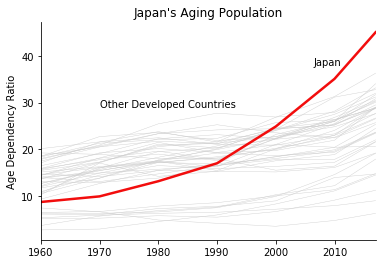

In [193]:
fig, ax = plt.subplots()

not_japan = list(df.columns)
not_japan.remove("Japan")

df[not_japan].plot(ax=ax, color=[(0.8, 0.8, 0.8)], lw=0.4, legend=False)
ax.text(1970, 29, "Other Developed Countries")

df["Japan"].plot(ax=ax, color=(0.95, 0.05, 0.05), lw=2.5, legend=False)
ax.text(2006.5, 38, "Japan")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Japan's Aging Population")
ax.set_ylabel("Age Dependency Ratio")

However, placing this many lines on a single plot is definitely an exception and we encourage you
to do so sparingly

Generally, you should only have a few informative lines for each plot

We now will focus our graph on a few countries of interest

To do so, the plot below uses many different line styles

Text(0, 0.5, 'Age Dependency Ratio')

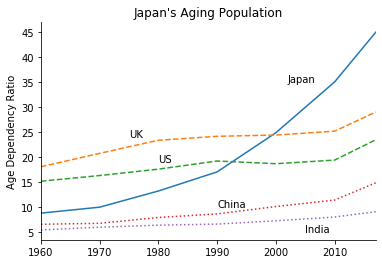

In [195]:
fig, ax = plt.subplots()

df["Japan"].plot(ax=ax, legend=False, linestyle="solid")
ax.text(2002, 35, "Japan")
df["United Kingdom"].plot(ax=ax, legend=False, linestyle="dashed")
ax.text(1975, 24, "UK")
df["United States"].plot(ax=ax, legend=False, linestyle="dashed")
ax.text(1980, 19, "US")
df["China"].plot(ax=ax, legend=False, linestyle="dotted")
ax.text(1990, 10, "China")
df["India"].plot(ax=ax, legend=False, linestyle="dotted")
ax.text(2005, 5, "India")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Japan's Aging Population")
ax.set_ylabel("Age Dependency Ratio")

There are some good use cases for using line styles to distinguish between different pieces
of data, but not many

In particular, having this many different styles and colors makes it difficult to figure out what is going on

Instead, we recommend using color and line width instead of line styles to highlight certain pieces of
information as seen below

Text(0, 0.5, 'Age Dependency Ratio')

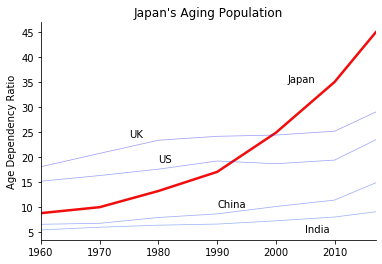

In [196]:
fig, ax = plt.subplots()

emph_color = (0.95, 0.05, 0.05)
sec_color = [(0.05, 0.05+0.075*x, 0.95) for x in range(4)]
df["Japan"].plot(ax=ax, legend=False, color=emph_color, linewidth=2.5)
ax.text(2002, 35, "Japan")
df["United Kingdom"].plot(ax=ax, legend=False, color=sec_color[0], alpha=0.4, linewidth=0.75)
ax.text(1975, 24, "UK")
df["United States"].plot(ax=ax, legend=False, color=sec_color[1], alpha=0.4, linewidth=0.75)
ax.text(1980, 19, "US")
df["China"].plot(ax=ax, legend=False, color=sec_color[2], alpha=0.4, linewidth=0.75)
ax.text(1990, 10, "China")
df["India"].plot(ax=ax, legend=False, color=sec_color[3], alpha=0.4, linewidth=0.75)
ax.text(2005, 5, "India")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Japan's Aging Population")
ax.set_ylabel("Age Dependency Ratio")

### Tick steps

Use easy to interpret increments such as multiples of 2, 5, 10, 25 etc…

Using increments like `0, 3, 6, 9, 12, ...` make it more difficult for your reader to do mentally
determine what the values between the lines are

[Text(0, 0, '0'),
 Text(0, 0, '5'),
 Text(0, 0, '10'),
 Text(0, 0, '15'),
 Text(0, 0, '20'),
 Text(0, 0, '25')]

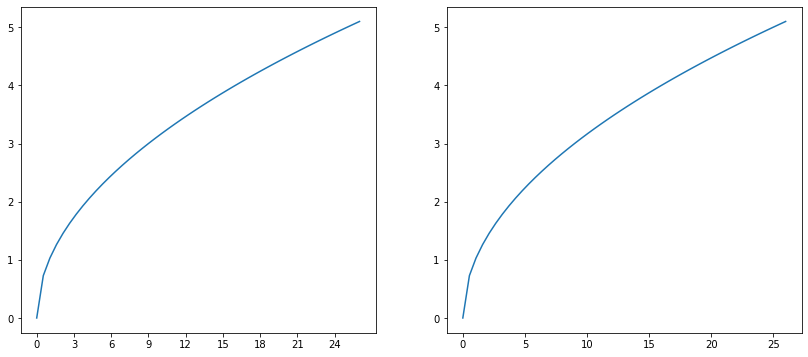

In [197]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

x = np.linspace(0, 26, 50)

ax[0].plot(x, np.sqrt(x))
ax[1].plot(x, np.sqrt(x))

ax[0].set_xticks(np.arange(0, 27, 3))
ax[0].set_xticklabels(np.arange(0, 27, 3))
ax[1].set_xticks(np.arange(0, 27, 5))
ax[1].set_xticklabels(np.arange(0, 27, 5))

### No background colors

There are no reasons to use background colors in your visualizations

Research has shown that white or very light grays provide the best contrast as a background

Compare the following graphs and think about which feels better

Text(0.5, 1.0, 'IF BUSH TAX CUTS EXPIRE\nTop Tax Rate')

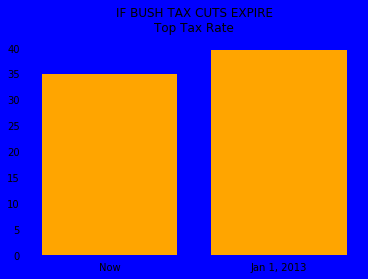

In [198]:
fig, ax = plt.subplots()

ax.bar([0, 1], [35, 39.6], color="orange")

ax.set_xticks([0, 1])
ax.set_xticklabels(["Now", "Jan 1, 2013"])
ax.set_ylim(0, 42)

bgcolor = "blue"
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

for _spine in ["right", "top", "left", "bottom"]:
    ax.spines[_spine].set_visible(False)

ax.set_title("IF BUSH TAX CUTS EXPIRE\nTop Tax Rate")

versus

Text(0.5, 1.0, 'IF BUSH TAX CUTS EXPIRE\nTop Tax Rate')

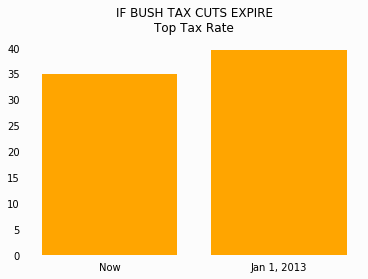

In [199]:
fig, ax = plt.subplots()

ax.bar([0, 1], [35, 39.6], color="orange")

ax.set_xticks([0, 1])
ax.set_xticklabels(["Now", "Jan 1, 2013"])
ax.set_ylim(0, 42)

bgcolor = (0.99, 0.99, 0.99)
fig.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

for _spine in ["right", "top", "left", "bottom"]:
    ax.spines[_spine].set_visible(False)

ax.set_title("IF BUSH TAX CUTS EXPIRE\nTop Tax Rate")

### Legends

Legends are quite common in charts, but many vizualization experts advise against using them

Legends have several weaknesses:

1. Relying solely on line color often makes a black and white version of your plot effectively
  useless since you don’t know if the colors will be distinguishable in grayscale  
1. Legends require people to distinguish between observations with small samples of the colors. For
  someone with weak eyesight or who is color blind, this can make interpreting graphs nearly
  impossible  
1. They add distance between the data and its description. This requires peoples’ eyes to go back
  and forth between the lines and the legend when trying to understand the story being told. This
  distracts from the ability to digest the story quickly and succinctly  


To demonstrate this, we revisit our age dependency ratio example from earlier

In [200]:
download_url = "https://storage.googleapis.com/qeds/data/WorldBank_AgeDependencyRatio.csv"
df = pd.read_csv(download_url, na_values="..")
df = df[["Country Name", "1960", "1970", "1980", "1990", "2000", "2010", "2017"]]
df = df.set_index("Country Name").T
df.index = df.index.values.astype(int)

With a legend

Text(0, 0.5, 'Age Dependency Ratio')

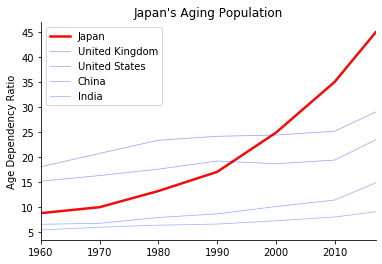

In [201]:
fig, ax = plt.subplots()

emph_color = (0.95, 0.05, 0.05)
sec_color = [(0.05, 0.05+0.075*x, 0.95) for x in range(4)]
df["Japan"].plot(ax=ax, legend=True, color=emph_color, linewidth=2.5)
df["United Kingdom"].plot(ax=ax, legend=True, color=sec_color[0], alpha=0.4, linewidth=0.75)
df["United States"].plot(ax=ax, legend=True, color=sec_color[1], alpha=0.4, linewidth=0.75)
df["China"].plot(ax=ax, legend=True, color=sec_color[2], alpha=0.4, linewidth=0.75)
df["India"].plot(ax=ax, legend=True, color=sec_color[3], alpha=0.4, linewidth=0.75)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Japan's Aging Population")
ax.set_ylabel("Age Dependency Ratio")

With labels

Text(0, 0.5, 'Age Dependency Ratio')

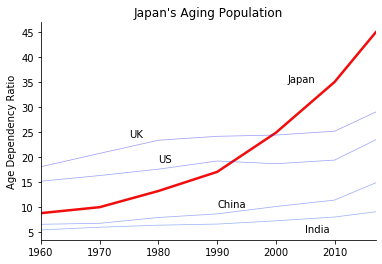

In [202]:
fig, ax = plt.subplots()

emph_color = (0.95, 0.05, 0.05)
sec_color = [(0.05, 0.05+0.075*x, 0.95) for x in range(4)]
df["Japan"].plot(ax=ax, legend=False, color=emph_color, linewidth=2.5)
ax.text(2002, 35, "Japan")
df["United Kingdom"].plot(ax=ax, legend=False, color=sec_color[0], alpha=0.4, linewidth=0.75)
ax.text(1975, 24, "UK")
df["United States"].plot(ax=ax, legend=False, color=sec_color[1], alpha=0.4, linewidth=0.75)
ax.text(1980, 19, "US")
df["China"].plot(ax=ax, legend=False, color=sec_color[2], alpha=0.4, linewidth=0.75)
ax.text(1990, 10, "China")
df["India"].plot(ax=ax, legend=False, color=sec_color[3], alpha=0.4, linewidth=0.75)
ax.text(2005, 5, "India")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("Japan's Aging Population")
ax.set_ylabel("Age Dependency Ratio")

Most people we have talked to find the example with labels to be a more readable graph

### Limit the information in a single plot

Don’t try to put too much information in a single plot!

We have tried to emphasize this point throughout this lecture, but it is important,
so we are emphasizing it again!

Don’t information overload your audience!

### Talk to other people

The last guideline we leave is that we encourage you to talk with others about your visualization

The best way to determine whether other people understand your message is to show it to them

## References

<a id='ely'></a>
**[1]** In particular, it is based on [this lecture](https://www.aeaweb.org/webcasts/2019/aea-ely-lecture-work-of-the-past-work-of-the-future)
by Autor presented at the annual AEA meeting in January, 2019. This
is a prestigious invited lecture with a large audience, so it is a more
“polished” than the typical academic lecture. It is worth
watching. Notice how almost every slide includes data
visualizations, and very few consist solely of text. Also, notice
the ways that the NYT modified Autor’s figures, and think about
whether these changes improved the figures.

## Exercises


<a id='exerciselist-0'></a>
**Exercise 1**

Create a draft of the other way we could have organized time and education

That is, have two subplots (one for each education level) and four groups of points (one for each year)

Why do you think they chose to organize the information the way they did rather than this way?

([*back to text*](#exercise-0))

**Exercise 2**

Using the data on Canadian GDP growth below, create a bar chart which uses one color for the
bars for the years 2000 to 2008, a red for 2009, and the same color as before for 2010 to 2018

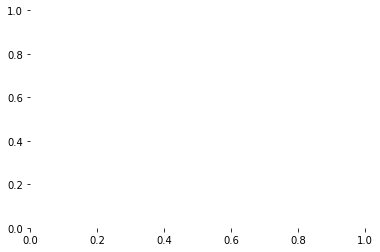

In [203]:
ca_gdp = pd.Series(
    [5.2, 1.8, 3.0, 1.9, 3.1, 3.2, 2.8, 2.2, 1.0, -2.8, 3.2, 3.1, 1.7, 2.5, 2.9, 1.0, 1.4, 3.0],
    index=list(range(2000, 2018))
)

fig, ax = plt.subplots()

for side in ["right", "top", "left", "bottom"]:
    ax.spines[side].set_visible(False)

([*back to text*](#exercise-1))